In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def first_number(error):
    error = str(error)
    if "e" in error:
        return error[0]
    else:
        error = error.strip("0.")
        return error[0]

### Acceptance rates

In [45]:
def acc_rates(a_list,lamb,start=1,size=10):
    plt.figure(figsize=(15,5))
    for a in a_list:
        df = pd.read_csv(f"./Datos/Oscillator/acc_rates/acc_l_{lamb}_a_{a}.csv")

        epsilons = df["epsilon"]
        acc_rates = df["mean"]
        stderrs = df["se"]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a}")

    plt.axhline(0.75,color = "brown",alpha=0.4,ls="--",xmin=0,xmax=1,label="Target acc rate = 0.75") #Objetivo de 0.75 de acc_rate
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,1.1,0.1))
    plt.xlim(0)
    plt.grid()
    plt.legend()
    plt.show()

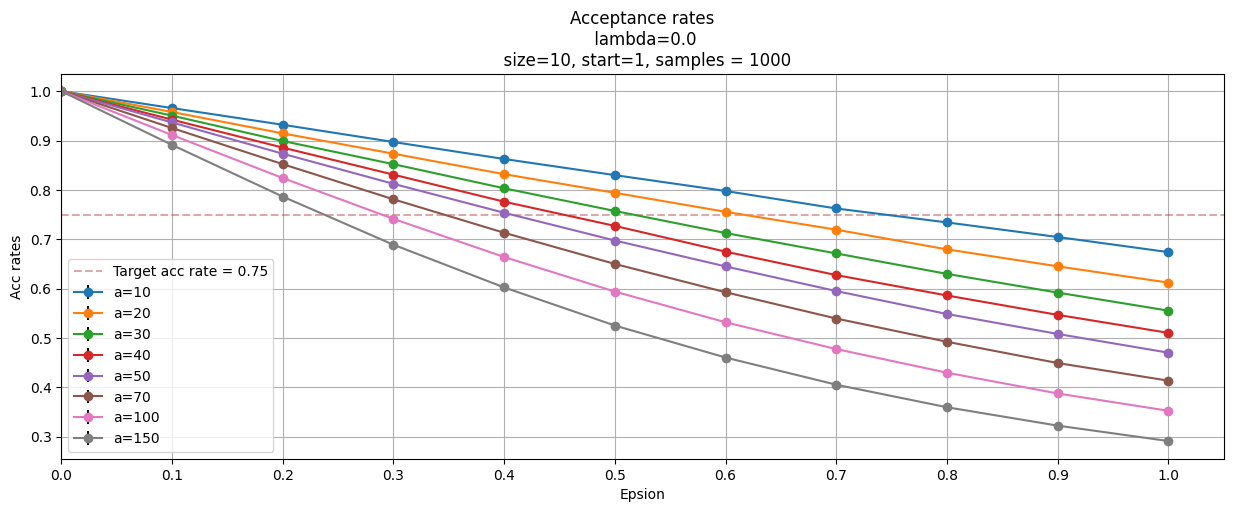

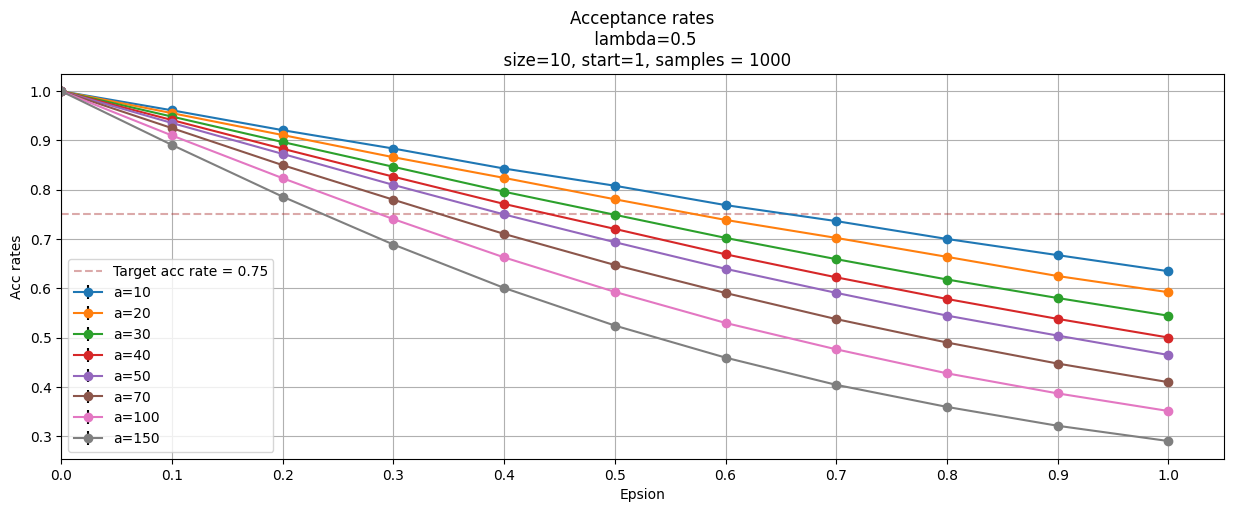

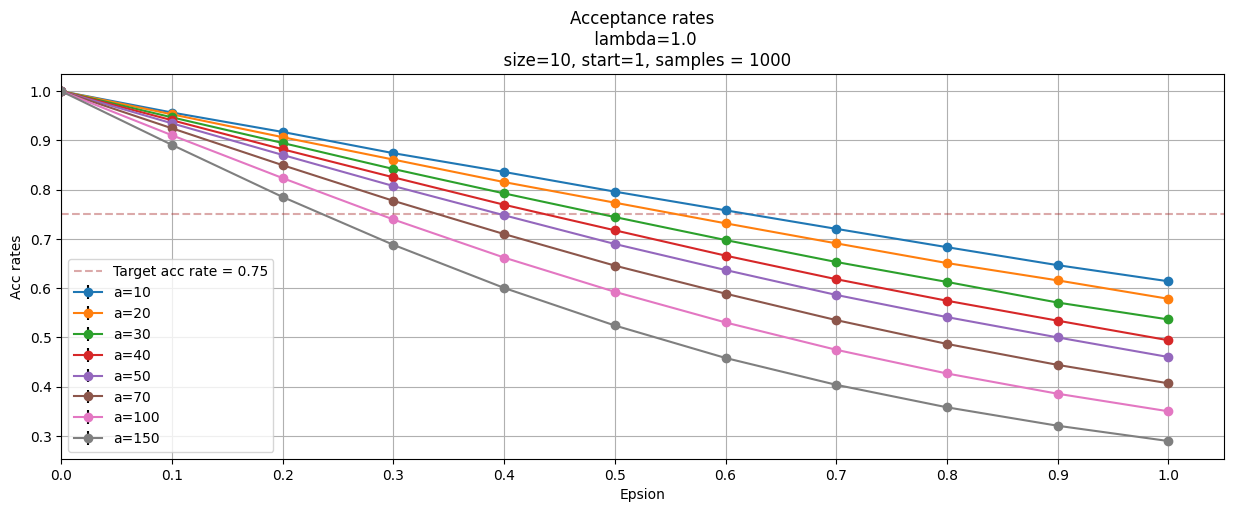

In [46]:
a_list = ["10","20","30","40","50","70","100","150"]
acc_rates(a_list,lamb="0.0")
acc_rates(a_list,lamb="0.5")
acc_rates(a_list,lamb="1.0")

### Action vs sweeps


In [117]:
def hot_cold(lamb):
    df = pd.read_csv(f"./Datos/Oscillator/SE/lambda_{lamb}.csv",on_bad_lines="skip")
    
    y0 = df["SE_cold"]
    y1 = df["SE_hot"]

    plt.figure(figsize=(20,5))
    #plt.plot(y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.4f}$\pm${np.sqrt(y0.var()/len(y0)):0.3f}")
    plt.plot(y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.4f}$\pm${np.sqrt(y1.var()/len(y1)):0.3f}")

    #plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title("S_E vs sweeps\nsweeps: 510000\ntermalization: 1000, steps: 10\na=1, measurements = 10000, λ=%s"%(lamb))

    plt.xlabel("sweeps")
    plt.xlim(50000,50100)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

In [ ]:
hot_cold(lamb="0")
hot_cold(lamb="0.5")
hot_cold(lamb="1.0")

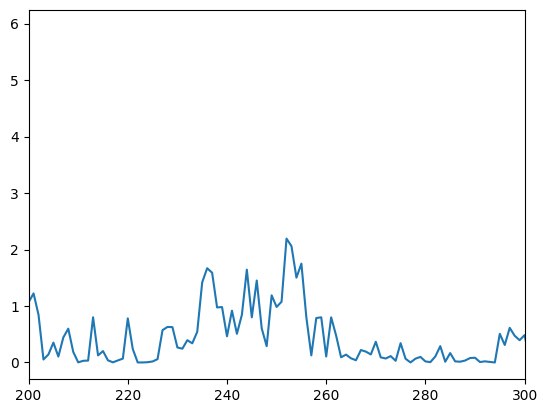

In [31]:
x = pd.read_csv(r"/home/agustin/Escritorio/Servicio/Notebooks_Py/Datos/oscillatorF/Esweeps.csv")
plt.plot(x)
plt.xlim(200,300)
plt.show()

In [3]:
def energy_plot(x,y,yerr,lambda_):
    def theoretical_energy(x,a,b):
        return a*x**2+b

    x_theo = np.linspace(0,1,100)

    popt,pcov = curve_fit(theoretical_energy,x,y,sigma=yerr)

    residuals = (y - theoretical_energy(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err_comp, b_err_comp = np.sqrt(np.diag(pcov))
    a_err, b_err = first_number(a_err_comp), first_number(b_err_comp)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_energy(x_theo,*popt),color="red",label = "theoretical")
    plt.plot([],[],label=f"{popt[0]:0.4f}({a_err}) $x^2$ + {popt[1]:0.4f}({b_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}",color = "white")

    plt.title("$E_0$ vs $\Delta t$\n $\lambda$ = "+f"{lambda_}")
    plt.ylabel("$E_0$")
    plt.xlabel("$\Delta t$")
    plt.legend()
    plt.show()

    print(f"a = {popt[0]} , b = {popt[1]}")
    print(f"err_a = {a_err_comp}, err_b= {b_err_comp}")
    print(f"Reduced chi-squared = {reduced_chi_squared}")

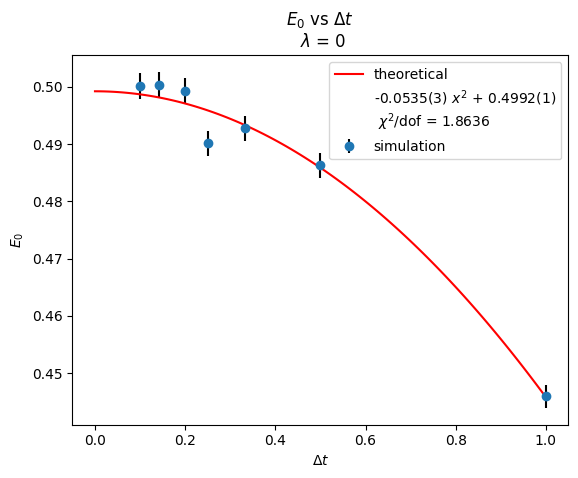

a = -0.05345628154823373 , b = 0.4992480690083143
err_a = 0.003207827527428173, err_b= 0.0013589811889297664
Reduced chi-squared = 1.8636428920206058


In [4]:
x = np.array([10,20,30,40,50,70,100])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l0.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 0
energy_plot(x,y,yerr,lambda_)


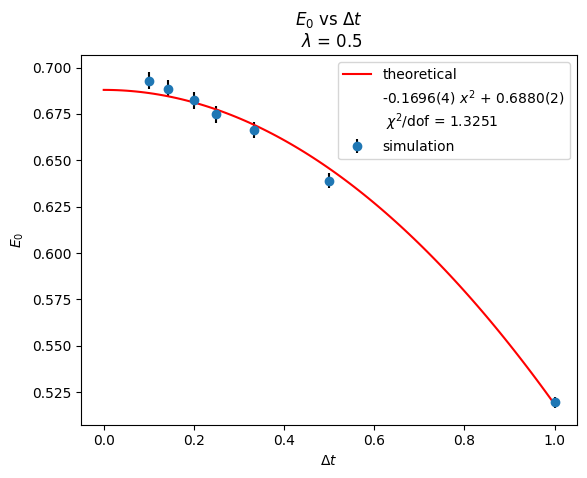

a = -0.16955794115154552 , b = 0.6879623107021495
err_a = 0.004365979025729983, err_b= 0.0022713135584908335
Reduced chi-squared = 1.3251259608014396


In [6]:
x = np.array([10,20,30,40,50,70,100])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l05.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 0.5
energy_plot(x,y,yerr,lambda_)

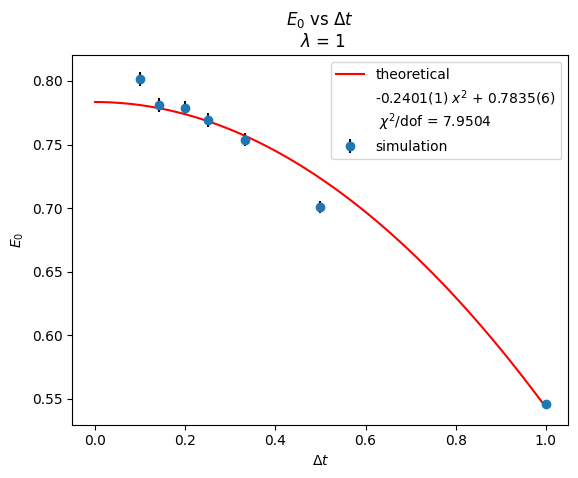

a = -0.2401074425737423 , b = 0.7834529828844569
err_a = 0.012024022857179434, err_b= 0.006680548496193558
Reduced chi-squared = 7.950408658370163


In [7]:
x = np.array([10,20,30,40,50,70,100])
x = 10/x

data  = pd.read_csv(r"Datos/oscillatorF/gs_l1.csv")
y = data[" E_0"]
yerr = data[" err"]

lambda_ = 1
energy_plot(x,y,yerr,lambda_)

In [8]:
def corr_plot(x,y,yerr,lambda_,n, percent = 95,logscale = False):
    x = (10*x)/n
    x = remove_center(x,percent)
    y = remove_center(y,percent)
    yerr = remove_center(yerr,percent)

    def theoretical_corr(x,a,xi):
        return a*np.cosh((x-5)/xi)

    x_theo = np.linspace(0,10,100)

    popt,pcov = curve_fit(theoretical_corr,x,y,sigma=yerr)

    residuals = (y - theoretical_corr(x, *popt))/yerr
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(popt)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    
    a_err_comp, xi_err_comp = np.sqrt(np.diag(pcov))
    a_err, xi_err = first_number(a_err_comp), first_number(xi_err_comp)

    plt.errorbar(x,y,yerr=yerr,marker="o",ls="",ecolor="k",label = "simulation")
    plt.plot(x_theo,theoretical_corr(x_theo,*popt),color="red",label = "theoretical")
    #plt.plot([],[],label=f"a = {popt[0]}({a_err}), $\xi$ = {popt[1]}({xi_err})\n $\chi ^2$/dof = {reduced_chi_squared:0.4f}")

    plt.title("corr(d)\n $\lambda$="+ f"{lambda_}")
    plt.ylabel("$corr$")
    plt.xlabel("d' = $\\Delta$ t d")
    plt.yscale("log") if logscale else None
    plt.legend()
    plt.show()

    print(f"a = {popt[0]} , xi = {popt[1]}")
    print(f"err_a = {a_err_comp}, err_xi = {xi_err_comp}")
    print(f"Reduced chi-squared = {reduced_chi_squared}")

def remove_center(arr, percentage):
    """
    Quita el centro de un array de NumPy basado en un porcentaje, conservando los extremos.
    
    :param arr: Array de NumPy del que se quieren quitar el centro.
    :param percentage: Porcentaje del centro que se desea eliminar (0 a 100).
    :return: Nuevo array con el centro eliminado.
    """
    if not (0 <= percentage <= 100):
        raise ValueError("El porcentaje debe estar entre 0 y 100.")
    
    # Calcular el número de elementos a quitar del centro
    total_length = len(arr)
    if total_length == 0:
        return arr  # Retornar el array vacío si no hay elementos
    
    # Calcular el número de elementos a eliminar del centro
    num_to_remove = int((percentage / 100) * total_length)
    
    # Si el porcentaje a eliminar es mayor o igual que el total, retornar un array vacío
    if num_to_remove >= total_length:
        return np.array([])

    # Calcular los índices de corte
    start_index = num_to_remove // 2
    end_index = total_length - (num_to_remove - start_index)

    # Retornar el array con el centro quitado
    return np.concatenate((arr[:start_index], arr[end_index:]))

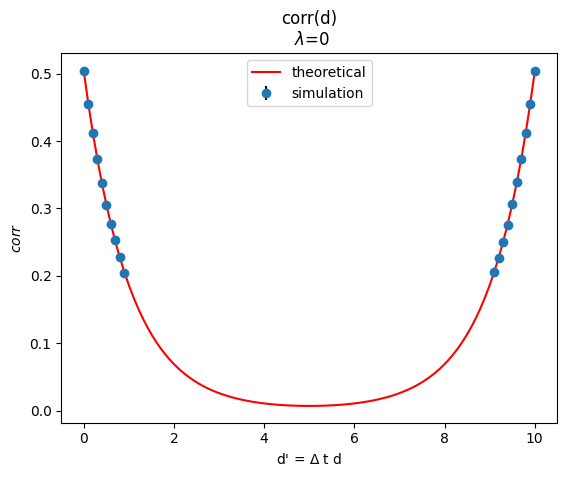

a = 0.0069386254535212565 , xi = 1.0047219264463623
err_a = 6.149669102291345e-05, err_xi = 0.0019178129266154075
Reduced chi-squared = 0.16051206453526654


In [9]:
n = 100
x = np.arange(0,n+1,1)
data  = pd.read_csv(r"Datos/oscillatorF/corr_l0.csv")
y = data[" corr"]
yerr = data[" err"]
lambda_ = 0
corr_plot(x,y,yerr,lambda_,n,percent = 20,logscale=False)


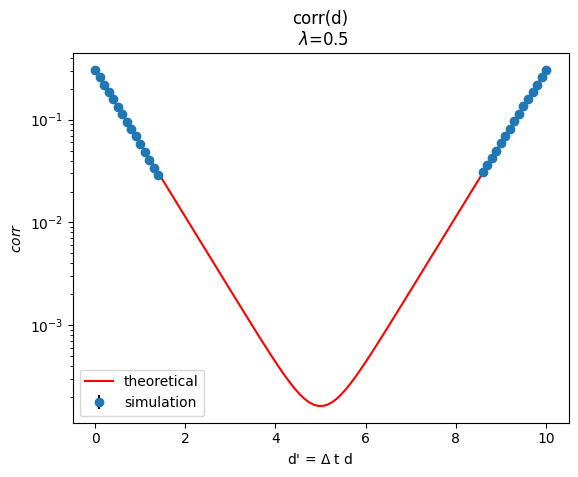

a = 0.0001635435920457651 , xi = 0.6081560861337622
err_a = 3.1170748834040896e-06, err_xi = 0.0014952720521012853
Reduced chi-squared = 0.7261313222962641


In [10]:
n = 100
x = np.arange(0,n+1,1)
data  = pd.read_csv(r"Datos/oscillatorF/corr_l05.csv")
y = data[" corr"]
yerr = data[" err"]
lambda_ = 0.5
corr_plot(x,y,yerr,lambda_,n,percent=30,logscale=True)


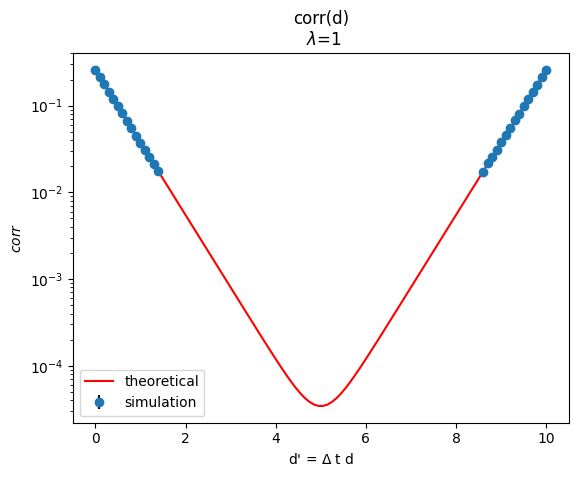

a = 3.42588876385412e-05 , xi = 0.5199151303834204
err_a = 4.908016902144551e-07, err_xi = 0.0008144267200212714
Reduced chi-squared = 0.289276867515384


In [11]:
n = 100
x = np.arange(0,n+1,1)
data  = pd.read_csv(r"Datos/oscillatorF/corr_l1.csv")
y = data[" corr"]
yerr = data[" err"]
lambda_ = 1
corr_plot(x,y,yerr,lambda_,n,percent=30,logscale=True)


$a = \frac{L}{N}$